In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
import sys

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
sys.path.insert(0, SOURCE_DIR)

In [3]:
import malaya_speech
import tensorflow as tf

In [4]:
tf_featurizer = malaya_speech.tf_featurization.STTFeaturizer()
featurizer = malaya_speech.featurization.STTFeaturizer()

In [5]:
tf_x = tf.placeholder(tf.float32, [None])
tf_y = tf_featurizer(tf_x)
tf_y

<tf.Tensor 'truediv_3:0' shape=(?, 80, 1) dtype=float32>

In [6]:
x, sr = malaya_speech.load('../speech/example-speaker/husein-zolkepli.wav')
len(x), sr

(90090, 16000)

In [9]:
y = featurizer(x)
y.shape

(564, 80)

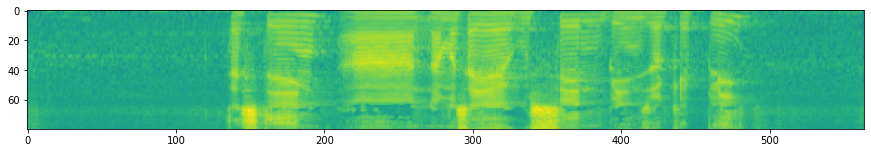

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.imshow(y.T)

In [11]:
sess = tf.InteractiveSession()

In [13]:
tf_y_ = sess.run(tf_y, feed_dict = {tf_x: x})
tf_y_.shape

(561, 80, 1)

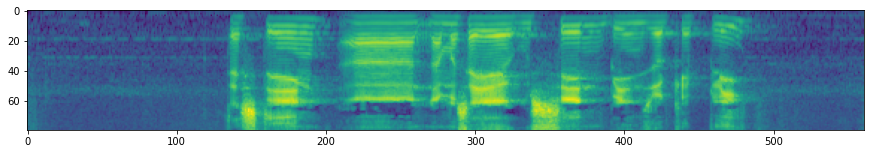

In [14]:
plt.figure(figsize = (15, 5))
plt.imshow(tf_y_[:,:,0].T)